In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



In [3]:
X, y = make_moons(n_samples=200, random_state=42)




In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



##### SVM with both kernels

In [6]:

svm_linear = SVC(kernel='linear')

svm_rbf = SVC(kernel='rbf')


In [7]:
# Train the models.
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)



SVC()


##### Decision Boundary Visualization

In [17]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

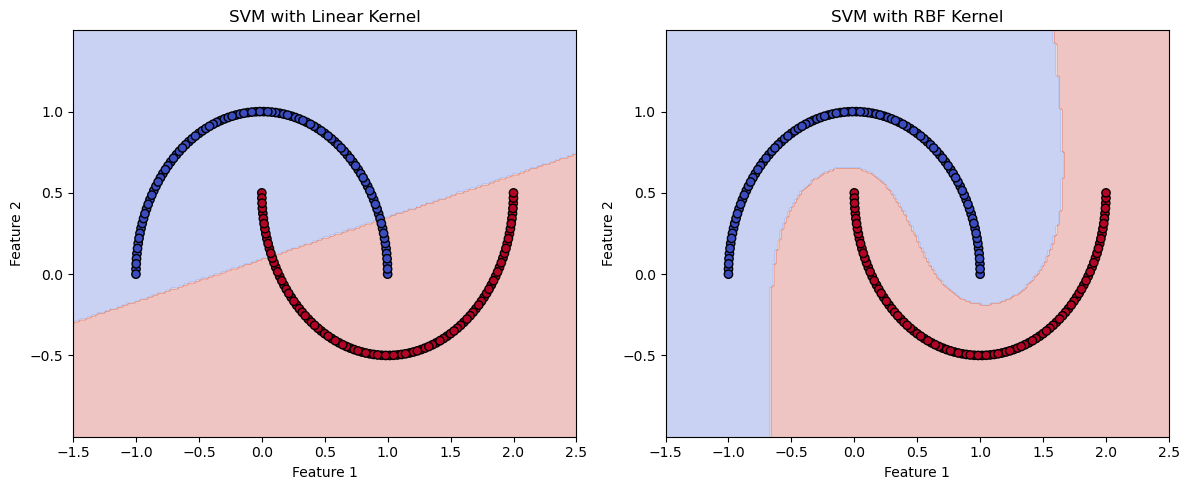

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear, X, y, "SVM with Linear Kernel")

plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")

plt.tight_layout()
plt.show()